# We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?



Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from pandas_datareader import data, wb
from pandas_datareader.data import DataReader 

In [ ]:
from datetime import datetime

In [ ]:
from __future__ import division

In [8]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [9]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [10]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [16]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,130.400518,127.475617,128.960120,128.960916,1.028079e+08,128.538118
std,11.006357,11.301046,11.094016,11.246876,3.867855e+07,11.405017
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,122.024998,118.980000,120.500000,120.649998,7.631090e+07,120.175510
50%,128.710007,126.379997,127.820000,127.449997,9.407120e+07,127.212296
75%,136.440002,133.665001,135.654999,134.930000,1.173158e+08,134.494164
max,154.979996,153.089996,153.869995,154.300003,2.871049e+08,154.300003


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-09-08 to 2021-09-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

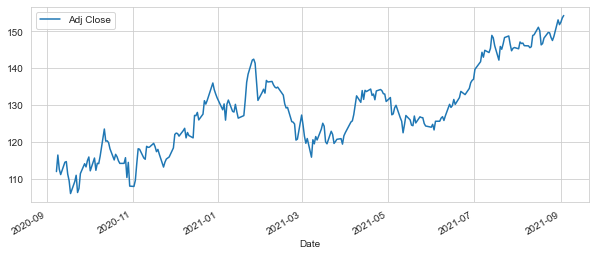

In [19]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

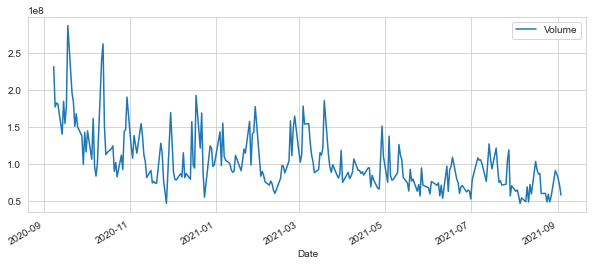

In [20]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [38]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name]=pd.DataFrame.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

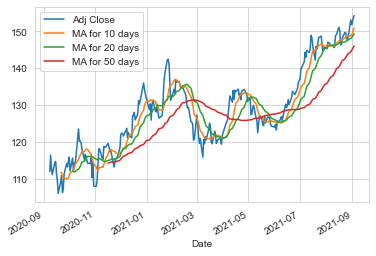

In [39]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False)

In [ ]:
#Daily returns and risk of the stock

<AxesSubplot:xlabel='Date'>

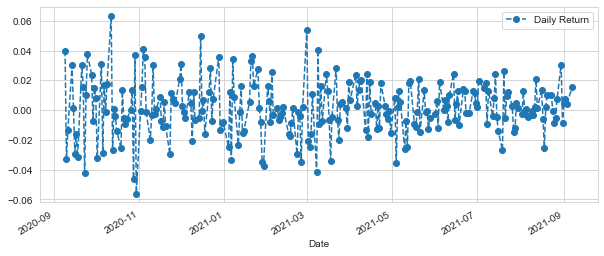

In [11]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

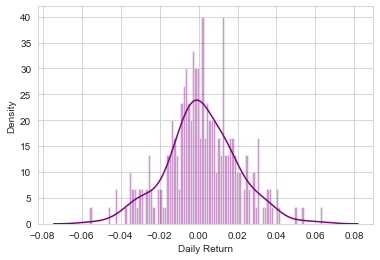

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

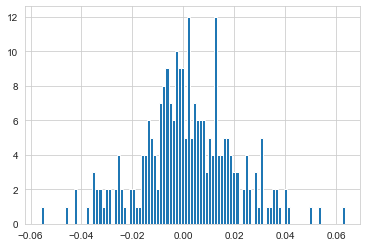

In [15]:
AAPL['Daily Return'].hist(bins=100)

In [16]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-08,112.098999,1532.390015,200.817307,3149.840088
2020-09-09,116.570236,1556.959961,209.368820,3268.610107
2020-09-10,112.764717,1532.020020,203.502640,3175.110107
2020-09-11,111.284241,1520.719971,202.174850,3116.219971
2020-09-14,114.622765,1519.280029,203.542297,3102.969971


In [18]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-08,NaN,NaN,NaN,NaN
2020-09-09,0.039887,0.016034,0.042584,0.037707
2020-09-10,-0.032646,-0.016018,-0.028018,-0.028605
2020-09-11,-0.013129,-0.007376,-0.006525,-0.018547
2020-09-14,0.030000,-0.000947,0.006764,-0.004252


/Users/Lizak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


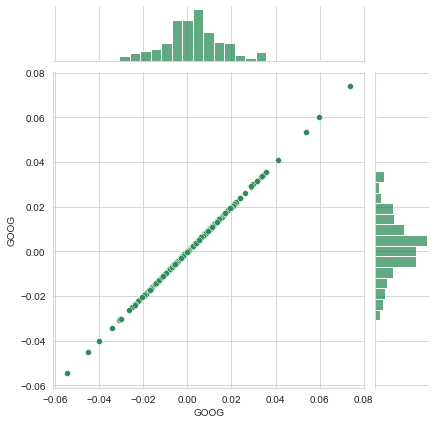

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

/Users/Lizak/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


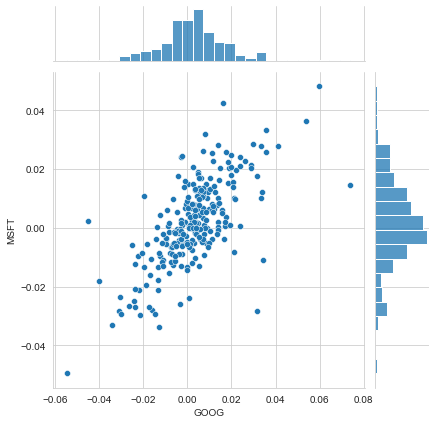

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

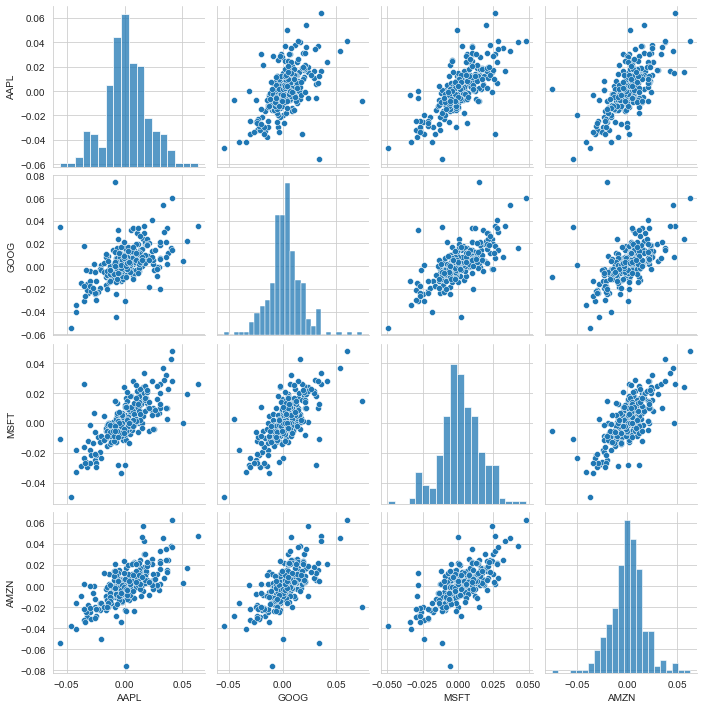

In [22]:
sns.pairplot(tech_rets.dropna())

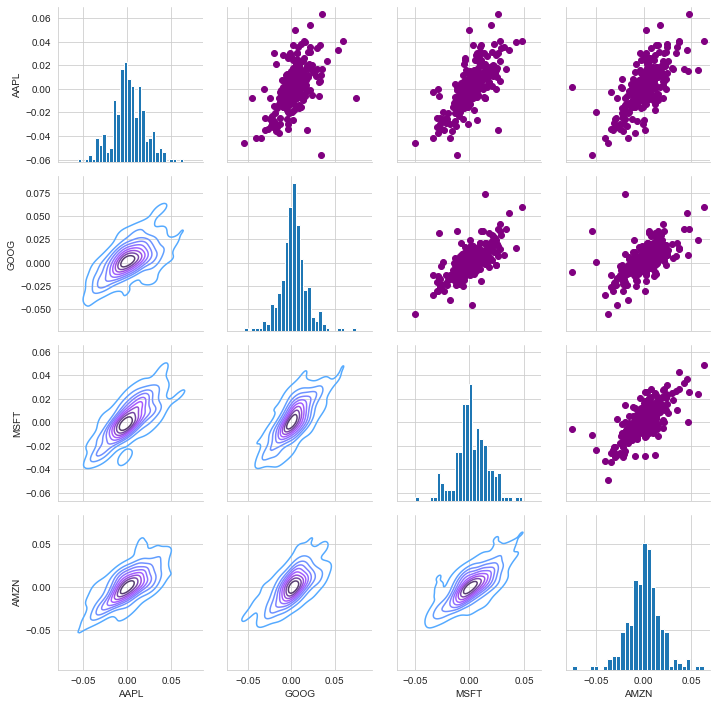

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

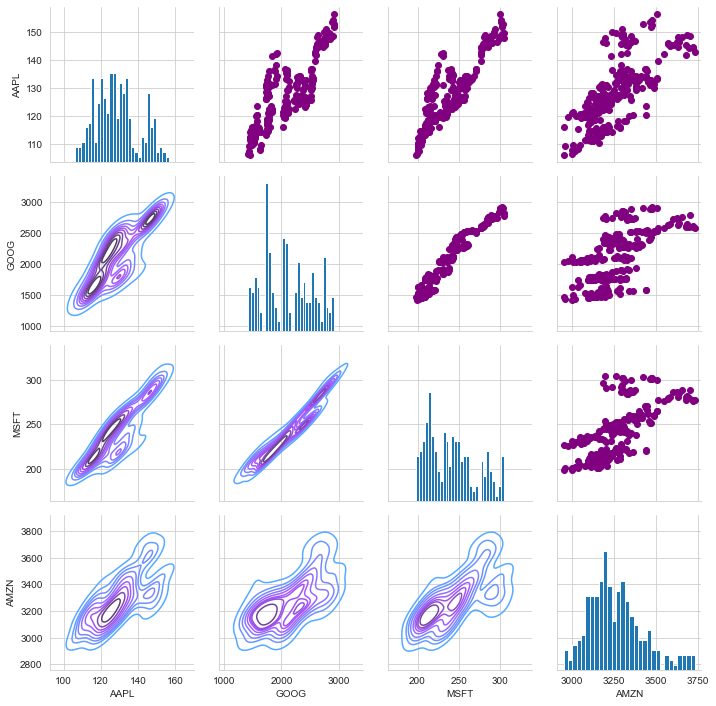

In [26]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

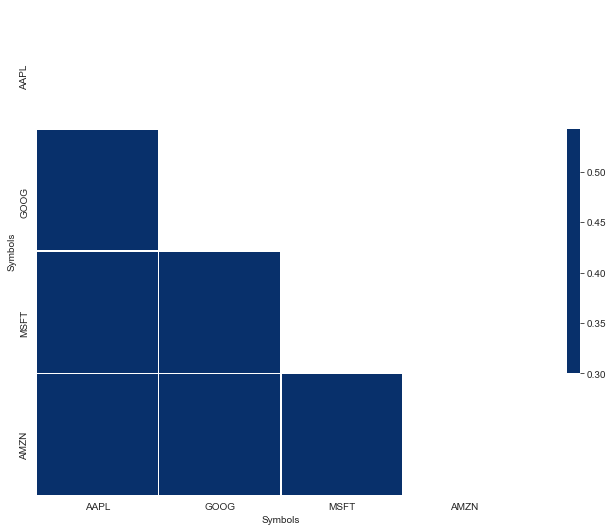

In [39]:
corr = tech_rets.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

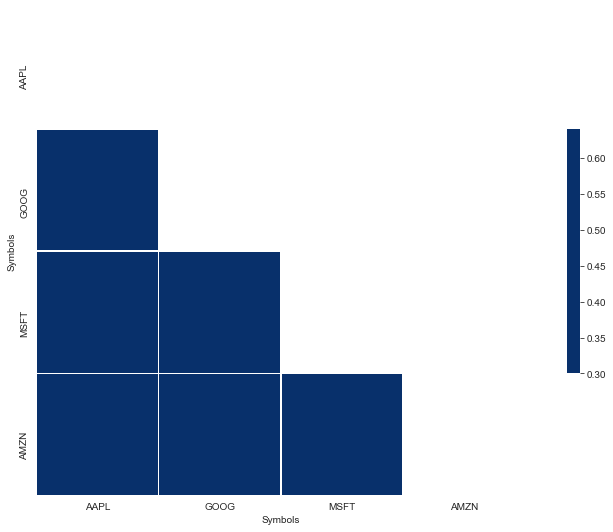

In [40]:
corr = closing_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
#Risk analysis

In [43]:
rets = tech_rets.dropna()

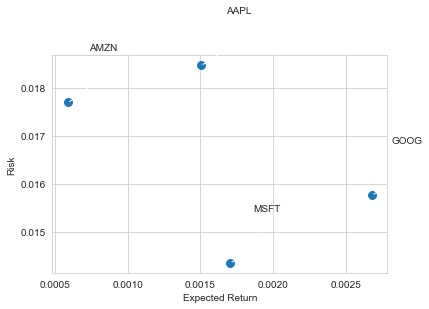

In [44]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [45]:
#Value at Risk

/Users/Lizak/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

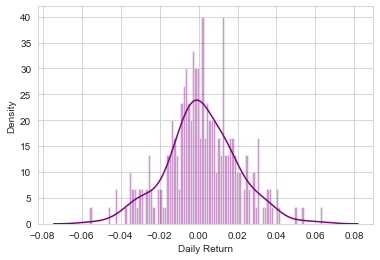

In [47]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [48]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-09,0.039887,0.016034,0.042584,0.037707
2020-09-10,-0.032646,-0.016018,-0.028018,-0.028605
2020-09-11,-0.013129,-0.007376,-0.006525,-0.018547
2020-09-14,0.030000,-0.000947,0.006764,-0.004252
2020-09-15,0.001560,0.014586,0.016406,0.017132


In [49]:
rets['AAPL'].quantile(0.05)

-0.03075961128706528

In [50]:
rets['GOOG'].quantile(0.05)

-0.02303614188379205

In [51]:
rets['AMZN'].quantile(0.05)

-0.028365576403511894

In [52]:
rets['MSFT'].quantile(0.05)

-0.025347421680748605

In [53]:
#Set up time horizon
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [54]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    
    return price

In [55]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-08,1563.864990,1528.010010,1533.510010,1532.390015,2610900,1532.390015
2020-09-09,1569.000000,1536.051025,1557.530029,1556.959961,1774700,1556.959961
2020-09-10,1584.081055,1525.805054,1560.640015,1532.020020,1618600,1532.020020
2020-09-11,1575.199951,1497.359985,1536.000000,1520.719971,1597100,1520.719971
2020-09-14,1564.000000,1515.739990,1539.005005,1519.280029,1696600,1519.280029


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

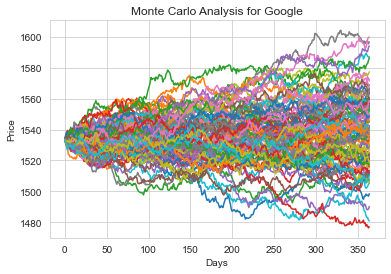

In [56]:
start_price = 1533.51

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [57]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

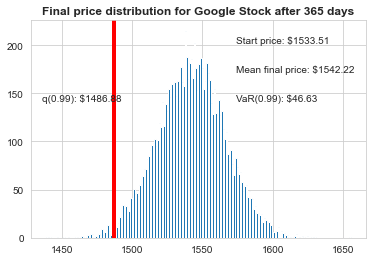

In [58]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price - q))

plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days,weight='bold');